<a href="https://colab.research.google.com/github/Alka-vish/Machine-Learning-Lab/blob/main/Exp_7_Gradient_decent_on_House_pricing_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/house_prices.csv')

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,N,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,N,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,N,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,N,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,N,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Optimal theta: [539238.35066227  -4488.56386723 -32946.5430314   35791.95776842
  81591.89470162   2786.39434191   3540.56067772      0.
  60299.80515186 105960.11290056  75838.43457011  27421.811816
 -83358.40275201   8587.5158919  -31872.84402909  81270.36314038
 -29157.6955858   16522.50216448  -8377.93468775]


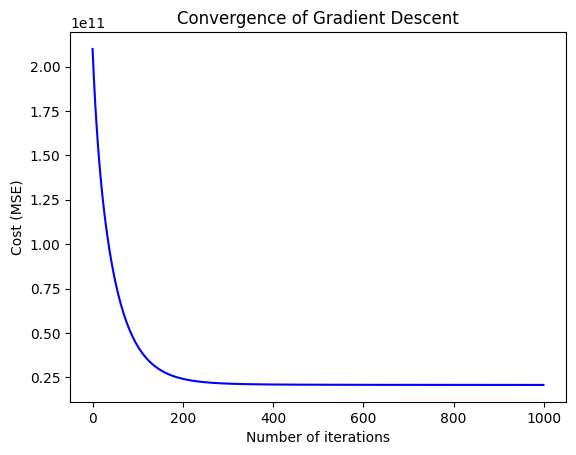

Mean Squared Error on the test set: 48592250136.515785


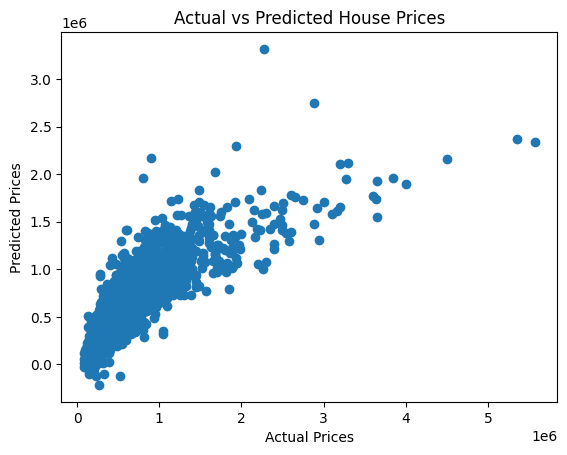

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load your dataset (assuming it's a CSV file)
# df = pd.read_csv('your_dataset.csv')

# Replace this with your actual data loading method
# Assuming you have a dataset similar to what you described

# For the purpose of this example, let's assume a dataframe 'df'
# and let's also assume 'price' is the target variable

# Example data setup
# df = pd.DataFrame({
#     'date': [], 'price': [], 'bedrooms': [], 'bathrooms': [], 'sqft_living': [], 'sqft_lot': [],
#     'floors': [], 'waterfront': [], 'view': [], 'grade': [], 'sqft_above': [], 'sqft_basement': [],
#     'yr_built': [], 'yr_renovated': [], 'zipcode': [], 'lat': [], 'long': [], 'sqft_living15': [],
#     'sqft_lot15': []
# })

# Data Preprocessing
# Convert 'waterfront' column to numeric
df['waterfront'] = df['waterfront'].apply(lambda x: 1 if x == 'Y' else 0)

# Select features (X) and target variable (y)
X = df.drop(columns=['price', 'date', 'condition'])  # Remove 'price', 'date', and 'condition' columns from features
y = df['price'].values  # Target variable

# Normalize features (important for gradient descent)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Add a column of ones to X_scaled for the bias term (theta_0)
X_scaled = np.c_[np.ones(X_scaled.shape[0]), X_scaled]

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Gradient Descent Implementation
def gradient_descent(X, y, learning_rate=0.01, iterations=1000):
    m = len(y)
    theta = np.zeros(X.shape[1])  # Initialize theta (weights)
    cost_history = []

    for _ in range(iterations):
        # Hypothesis: h = X * theta
        predictions = X.dot(theta)

        # Calculate the cost (Mean Squared Error)
        cost = (1 / (2 * m)) * np.sum(np.square(predictions - y))
        cost_history.append(cost)

        # Compute the gradient
        gradient = (1 / m) * X.T.dot(predictions - y)

        # Update theta (weights) using the gradient
        theta -= learning_rate * gradient

    return theta, cost_history

# Train the model using gradient descent
theta_optimal, cost_history = gradient_descent(X_train, y_train)

# Display the optimal weights
print(f'Optimal theta: {theta_optimal}')

# Plot the cost history to see if it converges
plt.plot(range(len(cost_history)), cost_history, color='blue')
plt.title('Convergence of Gradient Descent')
plt.xlabel('Number of iterations')
plt.ylabel('Cost (MSE)')
plt.show()

# Make predictions on the test set
y_pred = X_test.dot(theta_optimal)

# Calculate the Mean Squared Error on the test set
mse = np.mean((y_pred - y_test) ** 2)
print(f'Mean Squared Error on the test set: {mse}')

# Optionally, plot the predicted vs actual values for comparison
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.show()

In [ ]:
print(X.dtypes)

id                 int64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition         object
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [ ]:
print(df['grade'].unique())

[ 7  6  8 11  9  5 10 12  4  3 13  1]
